# Visualización de Datos sobre DS de Ganadores de Oscars.
### DS Utilizado: https://www.kaggle.com/fmejia21/demographics-of-academy-awards-oscars-winners

In [153]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [154]:
#Primero recordamos el DF que estamos utilizando:
oscars_short = pd.read_csv('data/Oscars-demographics-DFE.csv',
                        encoding='latin-1',
                        usecols = ['birthplace', 'date_of_birth','race_ethnicity','religion','sexual_orientation','year_of_award','award','movie','person'])
oscars_short.head(10)

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person
0,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone
1,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd
2,"Chisinau, Moldova",30-Sep-1895,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone
3,"Chicago, Il",23-Feb-1899,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog
4,"Salt Lake City, Ut",23-Apr-1894,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage
5,"Glasgow, Scotland",2-Feb-1886,White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd
6,"Bisacquino, Sicily, Italy",18-May-1897,White,Roman Catholic,Straight,1935,Best Director,It Happened One Night,Frank Capra
7,"Cape Elizabeth, Me",1-Feb-1894,White,Roman Catholic,Bisexual,1936,Best Director,The Informer,John Ford
8,"Bisacquino, Sicily, Italy",18-May-1897,White,Roman Catholic,Straight,1937,Best Director,Mr. Deeds Goes to Town,Frank Capra
9,"Los Angeles, Ca",3-Oct-1898,White,Na,Straight,1938,Best Director,The Awful Truth,Leo McCarey


In [155]:
oscars_short.shape #Tamaño de filas y columnas. 

(441, 9)

In [156]:
#date_of_birth es de tipo object en oscars_shorts.. 
#la vamos a CONVERTIR a formato fecha (Date):
oscars_short.loc[:,'date_of_birth'] = pd.to_datetime(oscars_short['date_of_birth'],errors = 'coerce')

In [157]:
oscars_short.count()

birthplace            441
date_of_birth         440
race_ethnicity        441
religion              441
sexual_orientation    441
year_of_award         441
award                 441
movie                 441
person                441
dtype: int64

In [158]:
oscars_short.drop_duplicates(inplace=True)   #Borramos los duplicados (VER DESPUES PORQUE HABIAN TANTOS, SI ESTO ESTA BIEN... AL PARECER EN EL EJEMPLO ESTA IGUAL, PERO IGUAL VERLO)

In [159]:
oscars_short.count()

birthplace            416
date_of_birth         415
race_ethnicity        416
religion              416
sexual_orientation    416
year_of_award         416
award                 416
movie                 416
person                416
dtype: int64

### 1-Histograma:

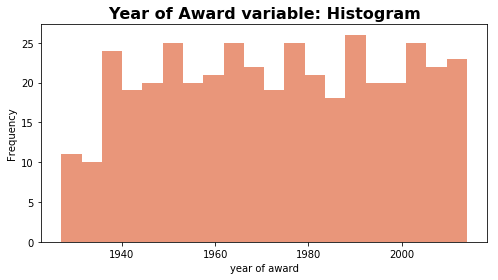

In [160]:
#Como vimos, en un histograma podemos graficar como se comporta 1 variable especifica.
#Para ver si los valores se concentran en un cierto rango o ver si estan distribuidos.

#En este caso vamos a plotear la variable year of award:
fig=plt.figure()
ax = fig.add_subplot(111)

#Vamos a ver cómo se distribuyen los valores de la variable year of award:
plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold') #titulo del plot.
ax.set_xlabel('year of award') #eje x nombre (los años)
oscars_short['year_of_award'].plot.hist(color='darksalmon', figsize=(8, 4), bins=20) #tamaño= 8 largo, 4 alto.
    #Y eso de bins tambien lo definimos: ya que el histograma divide los valores en bins (NO muestra la ocurrencia para cada uno 
    #de los valores, sino que dice "entre este rango tenemos estas instancias, entre este otro rango estas otras")
    #De esta manera con mientras más grande sea bins, mas particiones tendremos en nuestro eje y (que es la cantidad de registros que tenemos).

#Eje y= tenemos la frecuencia de la variable. 

plt.show()

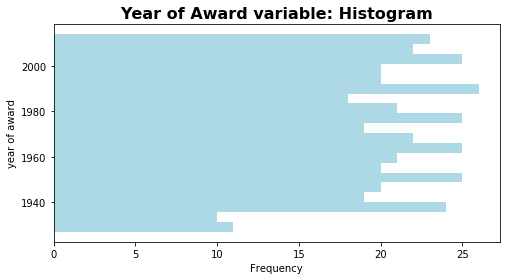

In [161]:
#Hacemos lo mismo pero con orientación horizontal:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
ax.set_ylabel('year of award') #eje y nombre.
#Esto de cambiar el sentido lo hacemos simplemente con orientation='horizontal'
oscars_short['year_of_award'].plot.hist(orientation='horizontal',color='lightblue', figsize=(8, 4), bins=20)
#Ahora vemos que la frecuencia la tenemos en el eje x. 
#Y el bins actua sobre la separación de dicho eje x ahora.

plt.show()

### 2-Density Plots:

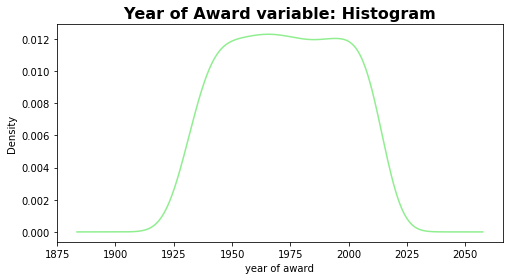

In [162]:
#Gráfico de densidad... otra opción para ver valores de una característica específica.

fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Year of Award variable: Histogram',fontsize=16,fontweight='bold')
ax.set_xlabel('year of award')
#Aca definimos el grafico de densidad: 
oscars_short['year_of_award'].plot.kde(color='lightgreen', figsize=(8, 4)) 
#Mostramos la variable year_of_award y estamos realizando un grafico de densidad (kde).
#Acá NO podemos usar los buckets / BINS... ya que aca si son instancias de como se comporta la variable 
#(vemos que entre 2025 y 2050 hay valores que estan mal ya que hay años de nacimiento en el futuro... que NO deberian estar 
#ya que chusmeando el dataset vemos que son 100 años corridos: esto después lo vamos a ajustar).
plt.show()

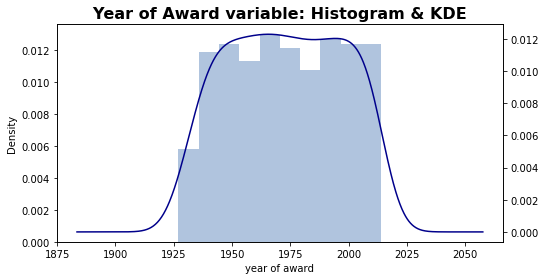

In [163]:
#Hicimos una variante de lo mismo pero superponiendo ambas cosas:
    #histograma=con las barras que estan detras; 
    #Y le agregamos el gráfico de densidad encima.
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('Year of Award variable: Histogram & KDE',fontsize=16,fontweight='bold')
ax.set_xlabel('year of award')
oscars_short['year_of_award'].plot.hist(color='lightsteelblue', figsize=(8, 4), density=True)
oscars_short['year_of_award'].plot.kde(color='darkblue', ax=ax, secondary_y=True)

ax.set_ylabel('Density')
plt.show()


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Other histogram & dencity plot')

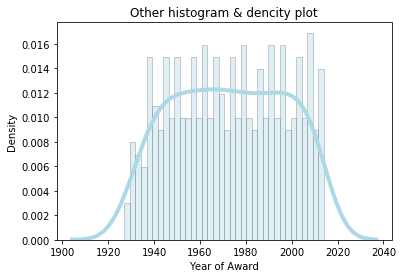

In [164]:
#Acá tenemos hacemosDensity Plot e Histogram usando "sns" (es otra forma de hacerlos):
sns.distplot(oscars_short['year_of_award'], hist=True, kde=True, 
             bins=int(180/5), color = 'lightblue', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

plt.xlabel('Year of Award')
plt.ylabel('Density')
plt.title('Other histogram & dencity plot')
#En el gráfico vemos que el histograma tiene barras más angostas.. ya que cuando más grandes son los bins, más achatado queda... ya que queda aplanada esa variación
#Y cuando más chiquitos se notan más los saltos. Por esto quedó distinto pero es la misma data. 
#Y el density plot si queda lo mismo que hicimos antes... ya que toma los valores de año tras año (acá no podemos alterarlo con los bins).

### 3-Bar Plot:

In [165]:
#Vamos a ver cuales son las personas que obtuvieron más premios.
#Obtenemos los premios y hacemos un value_count= 
oscars_per_person=oscars_short['person'].value_counts() #Value_count nos daba una serie. En donde tenemos el nombre de la variable 
#en este caso el nombre de la persona y su valor asociado (cantidad de ocurrencias de esa variable)
oscars_per_person.head(10) #Vemos los 10 primeros valores... pero tiene muchisimos más (la mayoría en 1 porque la mayor parte de las personas ganaron solo 1 premio)

Katharine Hepburn    4
John Ford            4
William Wyler        3
Meryl Streep         3
Daniel Day-Lewis     3
Ingrid Bergman       3
Jack Nicholson       3
Walter Brennan       3
Frank Capra          3
Robert De Niro       2
Name: person, dtype: int64

In [166]:
type(oscars_per_person) #Vemos que es de tipo Serie.

pandas.core.series.Series

In [167]:
oscars_per_person_df=oscars_per_person.to_frame() #Lo pasamos a DF.
oscars_per_person_df #Imprimimos el df
#De esta manera lo que antes era el nombre de cada elemento de la serie... ahora es el índice.
#Y person... que era lo que nosotros estabamos contando, ahora es el count de cada uno de los valores que aparece.

,person
Katharine Hepburn,4
John Ford,4
William Wyler,3
Meryl Streep,3
Daniel Day-Lewis,3
Ingrid Bergman,3
Jack Nicholson,3
Walter Brennan,3
Frank Capra,3
Robert De Niro,2


In [168]:
oscars_per_person_df.shape #Tamaño de filas y columnas. 

(348, 1)

In [169]:
#DESPUES ACA HACER PARA QUE ME DIGA CUANTAS PERSONAS TIENEN 4 PREMIOS, CUANTAS TIENEN 3, CUANTAS 2 Y CUANTAS 1 !
#Y HACER UN BAR PLOT DE ESTO. 

Text(0.5,0,'Name')

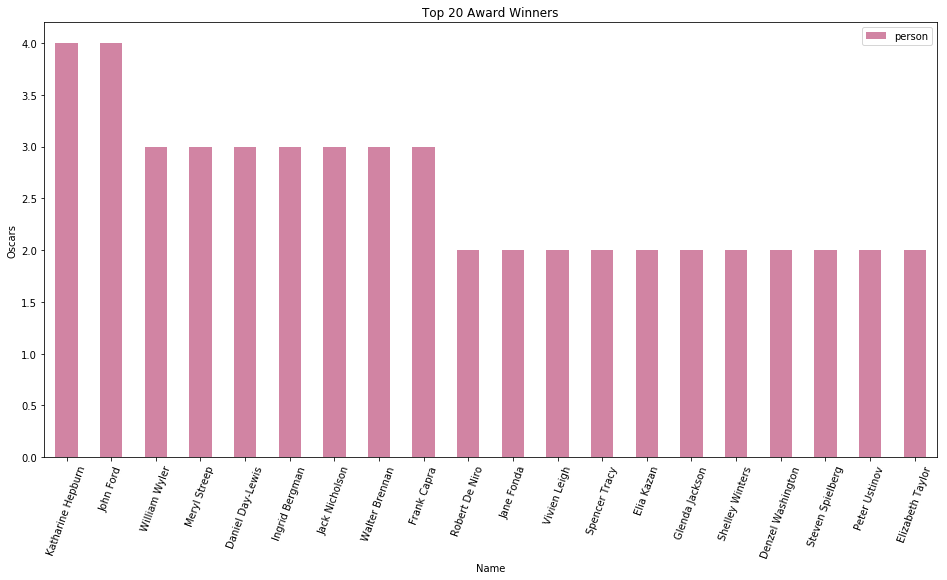

In [170]:
#Ya ahora hacemos el gráfico de barras:
colorrosa=(0.7, 0.2, 0.4, 0.6) #Definimos el color como una combinacion (rojo, verde, azul, transparencia). Y se lo asignamos abajo.

oscars_per_person_df.head(20).plot(kind='bar',figsize=(16,8),rot=70,title='Top 20 Award Winners',color=colorrosa);
#El rot=70 es la inclinacion que le damos a los labels del eje x (vemos que estan levemente rotados los nombres)
#Como hicimos un head(20) seria el TOP 20 de ganadores.
ax=plt.gca()

#Labels que le definimos para el eje x e y:
ax.set_ylabel('Oscars');
ax.set_xlabel('Name') 

#Entonces tenemos el nombre de las personas y las instancias que tenemos.

#CAMBIAR PAR QUE NO APAREZCA 0,5 NI 1,5... que sean solo enteros: VER

### 4-Scatter Plot

In [171]:
#Vamos a realizar la combinación de 2 variables. Y cuando se dé esta combinación de las 2 variables 
#nos va a poner un PUNTO. Entonces el Scatter Plot nos mostrará una serie de puntos que va a mostrarnos las
#distintas combinaciones de valores de 2 variables distintas.
oscars_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 415
Data columns (total 9 columns):
birthplace            416 non-null object
date_of_birth         415 non-null datetime64[ns]
race_ethnicity        416 non-null object
religion              416 non-null object
sexual_orientation    416 non-null object
year_of_award         416 non-null int64
award                 416 non-null object
movie                 416 non-null object
person                416 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 32.5+ KB


In [172]:
#Vemos el año de nacimiento vs la fecha en la que le entregaron el premio para ver asi
#cual fue el comportamiento de la edad respecto al año (para ver si mas o menos siempre se entregan premios a 
#gente de la misma edad o si en algún momento hubo variaciones en esto).

#Entonces sacamos la edad en la que recibió el premio... tomando el año del premio - AÑO de nacimiento (con dt.year)
#Si tendriamos la fecha exacta en la que se entregó el premio ahi seríamos mas exactos, pero no, solo tenemos el año.
oscars_short['age_at_award']=oscars_short['year_of_award']-(oscars_short['date_of_birth'].dt.year)

#Podemos hacer .dt.year ya que anteriormente definimos date_of_birth como de tipo datetime (sino NO podriamos hacer esto)

In [173]:
oscars_short #vemos la nueva columna agregada: age_at_award.
#Pero como vemos hay AÑOS NEGATIVOS... esto es lo que charlamos anteriormente en el histograma.
#Por ej. abajo vemos un ejemplo... el actor "Jerome Robbins" tiene un age_at_award de MENOS 56...
#esto es porque su fecha de nacimiento es en 2018-10-11 y la entrega de premio en 1962
#Como dijimos anteriormente es porque el DS estaba mal... hay algunos valores que NO son correctos.
#Chusmeando esas personas vimos que estan 100 años corridos en el dataset. POr el la del 2018 nació en 1918.
#Tambien hay persona que dice que nacieron en el 2060... esto es enrelalidad 1960...

#LO CORREGIMOS ABAJO.

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,44.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,36.0
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,33.0
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,39.0
5,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd,48.0
6,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1935,Best Director,It Happened One Night,Frank Capra,38.0
7,"Cape Elizabeth, Me",1894-02-01,White,Roman Catholic,Bisexual,1936,Best Director,The Informer,John Ford,42.0
8,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1937,Best Director,Mr. Deeds Goes to Town,Frank Capra,40.0
9,"Los Angeles, Ca",1898-10-03,White,Na,Straight,1938,Best Director,The Awful Truth,Leo McCarey,40.0


In [174]:
#Entonces acá vemos las personas con edad que recibieron el premio negativa (las que estan mal - vemos que son 316: LA MAYORIA ESTAN MAL, solo 100 estan bien):
#POR ESTO ES MUY IMOORTANTE EL ANALISIS EXPLORATORIO DE LOS DATOS... PARA PODER ENCONTRAR ERRORES EN LOS DATOS.
(oscars_short['age_at_award']>0).value_counts()

False    316
True     100
Name: age_at_award, dtype: int64

In [175]:
from datetime import datetime
hundred_years=datetime.strptime('0100-01-01','%Y-%m-%d') 
print(hundred_years)

0100-01-01 00:00:00


In [176]:
#Ahora si, vamos a corregir esto, para eso:

#Primero asignamos el año de nacimiento a 'year_of_birth' (tal cual lo obtuvimos)
oscars_short['year_of_birth']=oscars_short.loc[:,'date_of_birth'].dt.year

#Ahora en age_at_award guardamos el año premio - año fecha nacimiento: 
oscars_short['age_at_award']=oscars_short['year_of_award']-(oscars_short['date_of_birth'].dt.year)
#(nos va a seguir dando mal igualmente).

(oscars_short['age_at_award']<1).value_counts()
#vemos que tenemos 315 valores que son menores a 1 (Que tenemos que corregir)

True     315
False    101
Name: age_at_award, dtype: int64

In [177]:
#Ahora, para los casos donde la edad sea <1 nos vamos a quedar con el año de nacimiento. 
#Y a ese año de nacimiento le asignamos lo mismo - 100:
#Para esto usamos LOC, que actuaba sobre filas y columnas:
    #['age_at_award']<1 nos da una condicion sobre la fila (que la edad sea <1)
    #Y 'year_of_birth' nos da una condicion sobre la columna (Que muetre solo esa columna:year_of_birth )
oscars_short.loc[oscars_short['age_at_award']<1,'year_of_birth'] = oscars_short.loc[oscars_short['age_at_award']<1,'year_of_birth'] - 100
#--> Entonces.. a year_of_birth... para los que tienen una edad al momento de recibir el premio <1, le RESTAMOS 100.

#Entonces, para el registro 17 que antes teniamos que nacio en 2018... vemos que 
#ahora aparece bien en 'year_of_birth' --> que nació en 1918.0 (columna year_of_birth... ya que se cumplió la condición para esa fila que su 'age_at_award' era <1 )
#Pero seguimos teniendo la columna date_of_birth MAL, esto no nos importa igualmente.
oscars_short

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0,1895.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,44.0,1886.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,36.0,1895.0
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,33.0,1899.0
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,39.0,1894.0
5,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd,48.0,1886.0
6,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1935,Best Director,It Happened One Night,Frank Capra,38.0,1897.0
7,"Cape Elizabeth, Me",1894-02-01,White,Roman Catholic,Bisexual,1936,Best Director,The Informer,John Ford,42.0,1894.0
8,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1937,Best Director,Mr. Deeds Goes to Town,Frank Capra,40.0,1897.0
9,"Los Angeles, Ca",1898-10-03,White,Na,Straight,1938,Best Director,The Awful Truth,Leo McCarey,40.0,1898.0


In [178]:
#Y ahora nos falta corregir el age_at_Award... que lo volvemos a calcular 
#como antes (pero ahora nos dará bie): diferencia el año del premio - año del nacimiento (y ahora no usamos no usamos .dt.year ya que tenemos el AÑO de nacimiento, NO la fecha como antes)
oscars_short['age_at_award']=oscars_short['year_of_award']-(oscars_short['year_of_birth'])
#Ahora bien, el age_At_Award esta bien... para el 17 me da que age_at_award ya no es más MENOS 56, es +44!
#(ya que es 1962-1918)

In [179]:
oscars_short

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,32.0,1895.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,44.0,1886.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,36.0,1895.0
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,33.0,1899.0
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,39.0,1894.0
5,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1934,Best Director,Cavalcade,Frank Lloyd,48.0,1886.0
6,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1935,Best Director,It Happened One Night,Frank Capra,38.0,1897.0
7,"Cape Elizabeth, Me",1894-02-01,White,Roman Catholic,Bisexual,1936,Best Director,The Informer,John Ford,42.0,1894.0
8,"Bisacquino, Sicily, Italy",1897-05-18,White,Roman Catholic,Straight,1937,Best Director,Mr. Deeds Goes to Town,Frank Capra,40.0,1897.0
9,"Los Angeles, Ca",1898-10-03,White,Na,Straight,1938,Best Director,The Awful Truth,Leo McCarey,40.0,1898.0


In [180]:
oscars_short.loc[(oscars_short['age_at_award']<1),:] #Ahora vemos que ningún registro cumple la condición. BIEN.

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,age_at_award,year_of_birth


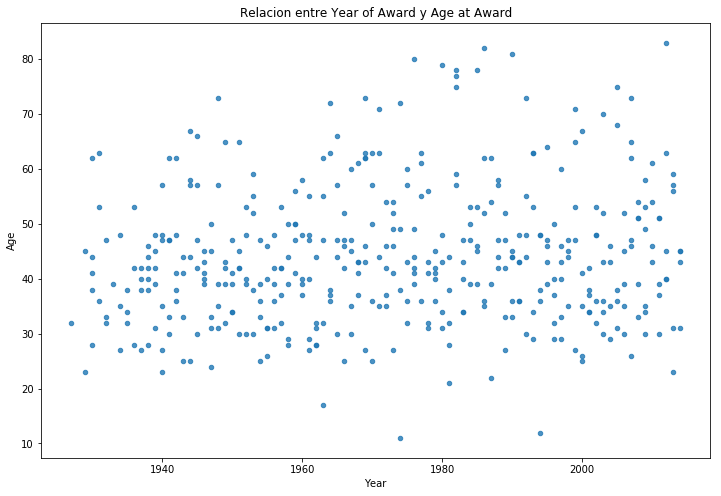

In [190]:
#Ahora ya con todas las edades que recibieron el oscar CON SENTIDO, hacemos el Scatter plot:
oscars_short.plot.scatter('year_of_award','age_at_award', title='Relacion entre Year of Award y Age at Award',alpha=0.8,figsize=(12,8));
#Comaramos el año del premio con la edad y la edad en que lo recibió. 
#alpha es solo la "oscuridad" de nuestros puntos (en 1 es la mayor).
ax=plt.gca()
ax.set_ylabel('Age')
ax.set_xlabel('Year');
#Vemos que la distribución es medianamente igualitaria.

In [194]:
#Ver estos 2 de abajo qué significan... porque de esto NO EXPLICÓ NADA. 

oscars_short.corr() #Vemos la correcioón de variables (solo de las numericas)
#Vemos que hay una fuerte correlación entre year_of_award y year_of_birth.

,year_of_award,age_at_award,year_of_birth
year_of_award,1.000000,0.123459,0.875404
age_at_award,0.123459,1.000000,-0.371617
year_of_birth,0.875404,-0.371617,1.000000


Text(0,0.5,'Columns')

<Figure size 432x288 with 0 Axes>

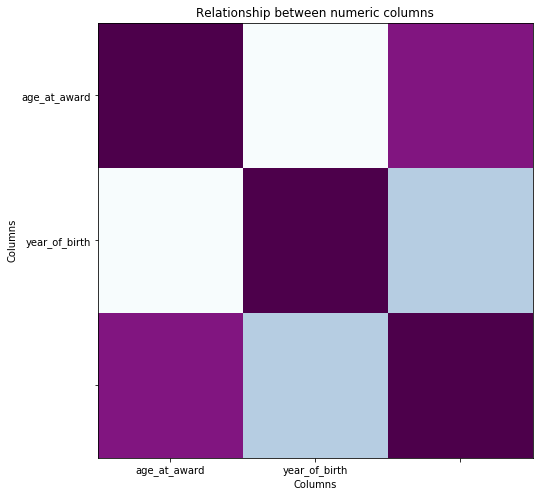

In [195]:
#Y obtenemos el gráfico de correlación para cada variable (Es mejor igual ver ejemplo que hice con Fede en IA TP2 - PONERLO)
cor = oscars_short.corr().abs()

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(8,8))
heatplot = ax.imshow(cor, cmap='BuPu')           #Ver esto. 
ax.set_xticklabels(cor.columns)
ax.set_yticklabels(cor.index)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title("Relationship between numeric columns")
ax.set_xlabel('Columns')
ax.set_ylabel('Columns')